In [1]:
import nltk

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
data_given = pd.read_csv('PROJECT.csv')

In [5]:
print(data_given)

    S.\nNo           State/UT  2019  \
0        1     Andhra Pradesh   870   
1        2  Arunachal Pradesh    60   
2        3              Assam  1235   
3        4              Bihar  3138   
4        5       Chhattisgarh   913   
5        6                Goa    33   
6        7            Gujarat   993   
7        8            Haryana  1137   
8        9   Himachal Pradesh    70   
9       10    Jammu & Kashmir   119   
10      11          Jharkhand  1626   
11      12          Karnataka  1314   
12      13             Kerala   323   
13      14     Madhya Pradesh  1795   
14      15        Maharashtra  2142   
15      16            Manipur    56   
16      17          Meghalaya    68   
17      18            Mizoram    22   
18      19           Nagaland    25   
19      20             Odisha  1356   
20      21             Punjab   679   
21      22          Rajasthan  1659   
22      23             Sikkim    17   
23      24         Tamil Nadu  1745   
24      25          Telan

In [6]:
data_given

,S.\nNo,State/UT,2019,Percentage State Share to All-India (2019),Mid-Year Projected Population (in Lakhs)\n(2019),Rate of Murder (2019)+,Disputes (Total),Property/ Land Dispute,Family Dispute,Petty Quarrel/D ispute,...,Unrecovered Victims of Previous Years Kidnapping & Abduction (As on 31/12/2018)* - Total,Persons Kidnapped & Abducted in 2019 - M,Persons Kidnapped & Abducted in 2019 - F,Persons Kidnapped & Abducted in 2019 - Total,Total Persons Kidnapped & Abducted - M,Total Persons Kidnapped & Abducted - F,Total Persons Kidnapped & Abducted - Total,Persons Recovered Alive - M,Persons Recovered Alive - F,Persons Recovered Alive - Total
0,1,Andhra Pradesh,870,3.0,523.2,1.7,369,77,154,102,...,743,258,678,936,384,1295,1679,210,634,844
1,2,Arunachal Pradesh,60,0.2,15.1,4.0,0,0,0,0,...,124,32,95,127,44,207,251,14,75,89
2,3,Assam,1235,4.3,344.2,3.6,562,426,95,22,...,17444,1255,8741,9996,13396,14044,27440,976,4904,5880
3,4,Bihar,3138,10.9,1201.1,2.6,1215,782,235,11,...,9719,1666,9056,10722,4508,15933,20441,1581,5653,7234
4,5,Chhattisgarh,913,3.2,288.5,3.2,211,50,126,25,...,1761,598,2111,2709,994,3476,4470,565,1951,2516
5,6,Goa,33,0.1,15.4,2.1,16,3,4,9,...,51,21,52,73,33,91,124,23,56,79
6,7,Gujarat,993,3.4,682.5,1.5,459,41,106,228,...,626,596,1272,1868,711,1783,2494,598,1322,1920
7,8,Haryana,1137,3.9,288.1,3.9,327,131,128,38,...,1696,809,3369,4178,1453,4421,5874,1032,3400,4432
8,9,Himachal Pradesh,70,0.2,73.2,1.0,13,2,4,5,...,286,125,353,478,206,558,764,168,510,678
9,10,Jammu & Kashmir,119,0.4,135.3,0.9,22,8,11,3,...,615,72,902,974,96,1493,1589,73,800,873


In [7]:
from sklearn import preprocessing
import matplotlib
from matplotlib import pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
data_given.describe()

,S.\nNo,2019,Percentage State Share to All-India (2019),Mid-Year Projected Population (in Lakhs)\n(2019),Rate of Murder (2019)+,Disputes (Total),Property/ Land Dispute,Family Dispute,Petty Quarrel/D ispute,Money Dispute,...,Unrecovered Victims of Previous Years Kidnapping & Abduction (As on 31/12/2018)* - Total,Persons Kidnapped & Abducted in 2019 - M,Persons Kidnapped & Abducted in 2019 - F,Persons Kidnapped & Abducted in 2019 - Total,Total Persons Kidnapped & Abducted - M,Total Persons Kidnapped & Abducted - F,Total Persons Kidnapped & Abducted - Total,Persons Recovered Alive - M,Persons Recovered Alive - F,Persons Recovered Alive - Total
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,18.500000,803.277778,2.772222,371.561111,2.194444,264.333333,87.250000,86.166667,58.777778,29.638889,...,2321.750000,641.777778,2358.916667,3000.694444,1507.722222,3814.722222,5322.444444,623.888889,2030.305556,2654.194444
std,10.535654,951.494242,3.296891,481.307604,0.956465,366.080475,164.053367,109.341013,100.078001,48.508705,...,4210.605694,885.310958,3496.714747,4272.434648,2661.146075,5932.683212,8168.573558,847.779849,2925.245346,3695.954590
min,1.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.750000,32.000000,0.100000,15.350000,1.700000,7.000000,0.000000,3.000000,1.000000,0.000000,...,50.750000,26.250000,79.750000,113.500000,44.000000,99.250000,163.750000,26.000000,70.250000,86.500000
50%,18.500000,422.000000,1.450000,243.750000,2.100000,92.000000,19.500000,29.500000,8.500000,9.000000,...,438.000000,209.000000,710.000000,955.000000,326.500000,1394.000000,1634.000000,195.500000,717.000000,939.500000
75%,27.250000,1324.500000,4.550000,557.325000,2.600000,373.250000,87.750000,129.250000,85.500000,35.500000,...,1762.250000,833.250000,3494.250000,4322.500000,1675.000000,4437.250000,5363.250000,990.000000,3289.000000,4581.500000
max,36.000000,3806.000000,13.200000,2259.700000,4.300000,1432.000000,782.000000,401.000000,409.000000,209.000000,...,17444.000000,3456.000000,14721.000000,16956.000000,13396.000000,26423.000000,31452.000000,3440.000000,13363.000000,15791.000000


In [9]:
def explore(row: float):
  if row >= 2.194444:
    return 'high'
  else:
    return 'low'

disputes = data_given['Rate of Murder (2019)+'].tolist()
classified_data = []
for i in disputes:
  classified_data.append(explore(i))

data_given['class']=classified_data
print(data_given)

    S.\nNo           State/UT  2019  \
0        1     Andhra Pradesh   870   
1        2  Arunachal Pradesh    60   
2        3              Assam  1235   
3        4              Bihar  3138   
4        5       Chhattisgarh   913   
5        6                Goa    33   
6        7            Gujarat   993   
7        8            Haryana  1137   
8        9   Himachal Pradesh    70   
9       10    Jammu & Kashmir   119   
10      11          Jharkhand  1626   
11      12          Karnataka  1314   
12      13             Kerala   323   
13      14     Madhya Pradesh  1795   
14      15        Maharashtra  2142   
15      16            Manipur    56   
16      17          Meghalaya    68   
17      18            Mizoram    22   
18      19           Nagaland    25   
19      20             Odisha  1356   
20      21             Punjab   679   
21      22          Rajasthan  1659   
22      23             Sikkim    17   
23      24         Tamil Nadu  1745   
24      25          Telan

In [10]:
class_high = data_given.loc[data_given['class'] == 'high']
mean_1 = np.mean(class_high, axis=0)
standard_1 = np.std(class_high, axis=0)
print(mean_1)
print()
print(standard_1)

S.\nNo                                                                                        17.56250
2019                                                                                         952.75000
Percentage State Share to All-India (2019)                                                     3.29375
Mid-Year Projected Population (in Lakhs)\n(2019)                                             341.77500
Rate of Murder (2019)+                                                                         3.00625
Disputes (Total)                                                                             320.12500
Property/ Land Dispute                                                                       125.50000
Family Dispute                                                                               106.56250
Petty Quarrel/D ispute                                                                        56.93750
Money Dispute                                                            

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3571: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [11]:
class_low = data_given.loc[data_given['class'] == 'low']
mean_2 = np.mean(class_low, axis=0)
standard_2 = np.std(class_low, axis=0)
print(mean_2)
print()
print(standard_2)

S.\nNo                                                                                        19.250
2019                                                                                         683.700
Percentage State Share to All-India (2019)                                                     2.355
Mid-Year Projected Population (in Lakhs)\n(2019)                                             395.390
Rate of Murder (2019)+                                                                         1.545
Disputes (Total)                                                                             219.700
Property/ Land Dispute                                                                        56.650
Family Dispute                                                                                69.850
Petty Quarrel/D ispute                                                                        60.250
Money Dispute                                                                              

In [12]:
#distance between mean vectors between classes
distance = np.linalg.norm(mean_1 - mean_2)
print(distance)

3806.0394519405772


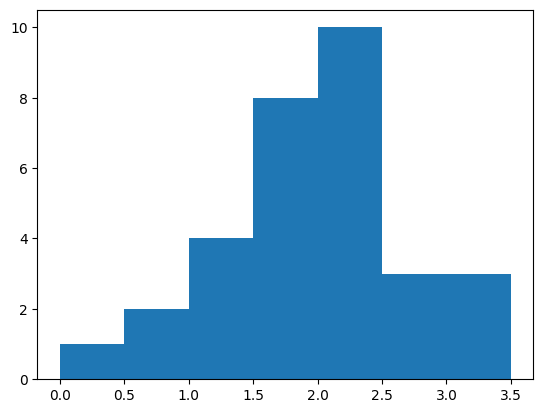

Mean:  2.1944444444444446
Variance:  0.914825396825397


In [13]:
#histogram to observe density
np.histogram(data_given['Rate of Murder (2019)+'],bins=[0,0.5,1,1.5,2,2.5,3,3.5],density=True)
plt.hist(data_given['Rate of Murder (2019)+'],bins=[0,0.5,1,1.5,2,2.5,3,3.5])
plt.show()
mean_lights = data_given['Rate of Murder (2019)+'].mean()
var_lights = data_given['Rate of Murder (2019)+'].var()
print("Mean: ",mean_lights)
print("Variance: ",var_lights)

In [14]:
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)

In [15]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 1)
print(dist)

82.39999999999999


In [16]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 2)
print(dist)

19.610201426808445


In [17]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 3)
print(dist)

14.024558934107525


In [18]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 4)
print(dist)

12.574143615286781


In [19]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 5)
print(dist)

12.040133870786626


In [20]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 6)
print(dist)

11.800292237536539


In [21]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 7)
print(dist)

11.677685364832016


In [22]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 8)
print(dist)

11.609417798986847


In [23]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 9)
print(dist)

11.569195196110053


In [24]:
dist = minkowski_distance(data_given['Percentage State Share to All-India (2019)'], data_given['Rate of Murder (2019)+'], 10)
print(dist)

11.544578292011282


[593.6, 116.95118639842863, 70.89715122671264, 56.16012675319698, 49.27558599401979, 45.401298743626626, 42.96544962055515, 41.31705597726003, 40.141559004021076, 39.26979412998772]


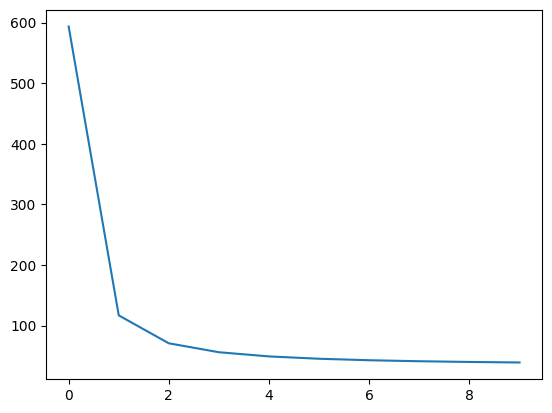

In [25]:
#minkowski distance with r from 1 to 10
x = data_given['Rate of Murder (2019)+']
y = data_given['S.\nNo']
plotting_distance = []
for r in range(1,11):
  plotting_distance.append(minkowski_distance(x,y,r))
print(plotting_distance)
plt.plot(plotting_distance)
plt.show()

In [27]:
#dividing into test and train
X = data_given.iloc[:,:-1]
y = data_given['class']

#using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.7)
print(y_test)

17     low
11     low
7     high
32     low
29    high
1     high
12     low
14     low
3     high
18     low
28     low
23    high
33    high
35     low
2     high
4     high
25    high
9      low
24    high
13    high
27     low
19    high
6      low
31     low
20    high
34     low
Name: class, dtype: object


In [28]:
#K-NN classifier
neigh = KNeighborsClassifier(n_neighbors=3)
x=X_train.iloc[:,5:-1]
neigh.fit(x, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
#accuracy of the KNN using test set
x1=X_test.iloc[:,5:-1]
s1=neigh.score(x, y_train)
s2=neigh.score(x1, y_test)
print(s1)
print(s2)

0.7
0.5


In [30]:
#using predict() function
neigh.predict(X_test.iloc[:,5:-1])

array(['low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low'],
      dtype=object)

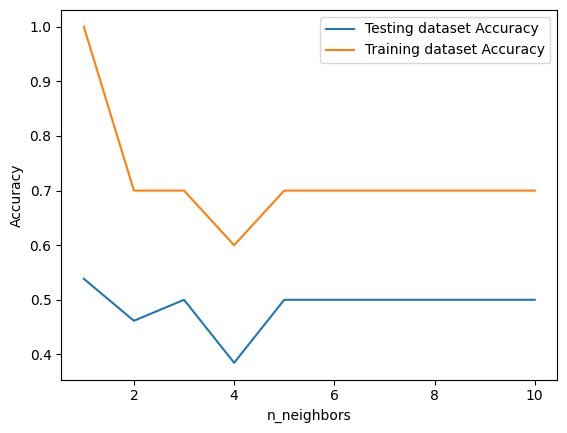

In [31]:
#compare the results with k from 1 to 11
neighbors = np.arange(1, 11)#if we take 11 it will print up to 10
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    neigh = KNeighborsClassifier(n_neighbors=k)
    x=X_train.iloc[:,5:-1]
    neigh.fit(x, y_train)
      
    train_accuracy[i] = neigh.score(X_train.iloc[:,5:-1], y_train)
    test_accuracy[i] = neigh.score(X_test.iloc[:,5:-1], y_test)
  
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

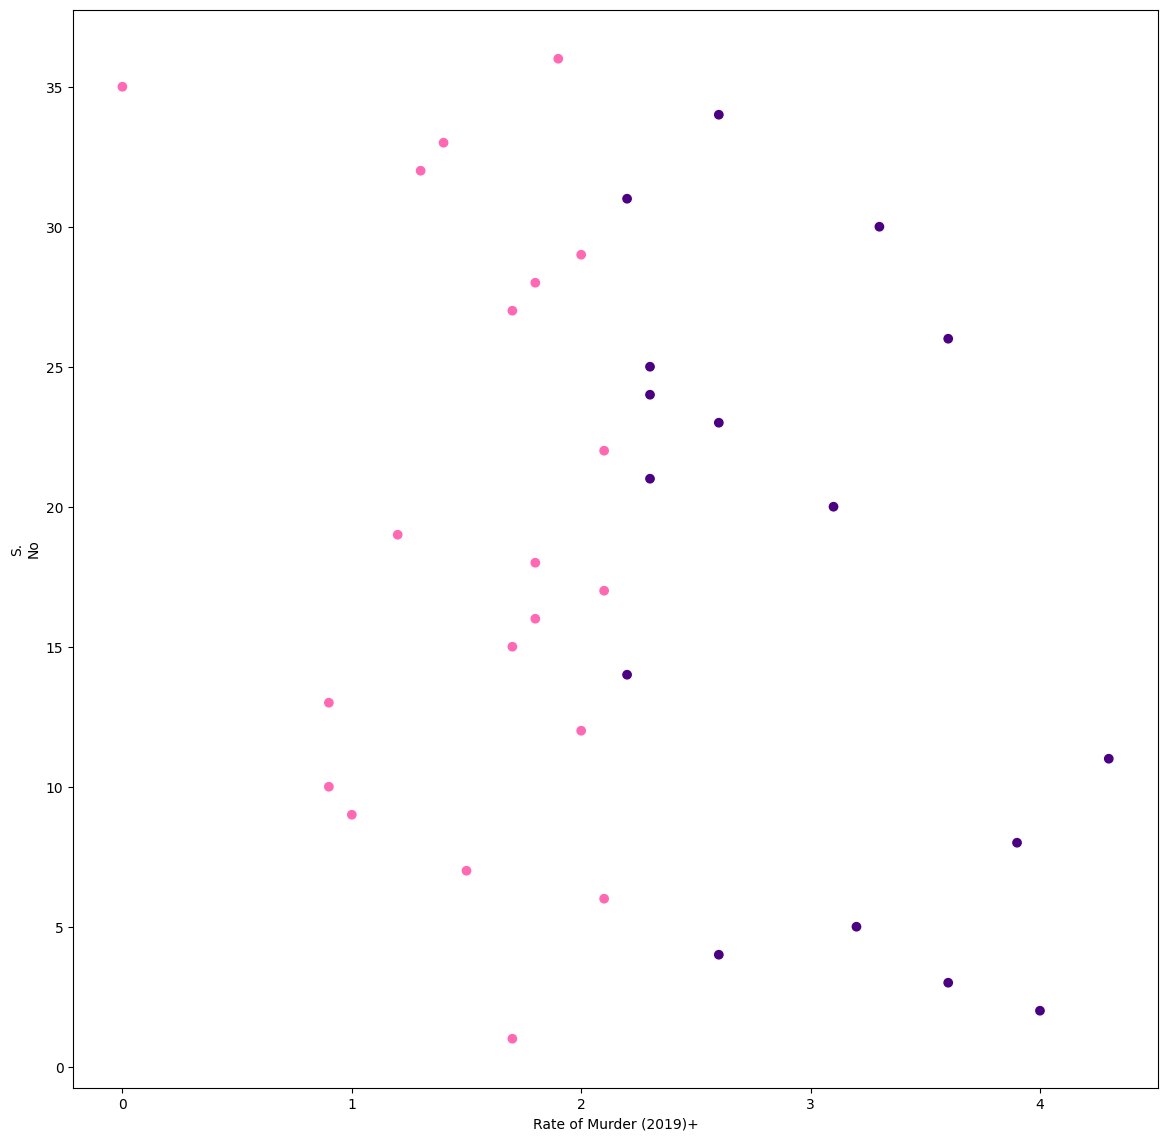

In [34]:
#accuracy plot
label = [0,1,0,1]
colors = {'high':'indigo','low':'hotpink'}

fig = plt.figure(figsize=(14,14))
plt.xlabel("Rate of Murder (2019)+")
plt.ylabel("S.\nNo")
plt.scatter(data_given['Rate of Murder (2019)+'], data_given['S.\nNo'], c=data_given['class'].map(colors))